# BASICS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv("dataset.csv")
dataset

,t_e_1,y_e_1,t_e_2,y_e_2,t_e_3,y_e_3,t_mean,y_mean,t_std,y_std
0,0.000000,1.176000,0.000000,1.143195,0.000000,1.151376,0.000000,1.156857,0.000000,0.013942
1,0.033211,1.178505,0.033300,1.139649,0.033300,1.138000,0.033270,1.152052,0.000042,0.018718
2,0.066522,1.166814,0.066578,1.129011,0.066589,1.116264,0.066563,1.137363,0.000029,0.021465
3,0.099811,1.152619,0.099878,1.107735,0.099878,1.085333,0.099856,1.115229,0.000031,0.027976
4,0.133111,1.134248,0.133178,1.069911,0.133178,1.043533,0.133156,1.082564,0.000031,0.038100
5,0.166389,1.105856,0.166478,1.021449,0.166478,0.985850,0.166448,1.037718,0.000042,0.050325
6,0.199700,1.065774,0.199756,0.959985,0.199756,0.925658,0.199737,0.983806,0.000026,0.059631
7,0.232967,1.022352,0.233067,0.902067,0.233056,0.852669,0.233030,0.925696,0.000045,0.071259
8,0.266278,0.959724,0.266344,0.824055,0.266356,0.768408,0.266326,0.850729,0.000034,0.080350
9,0.299578,0.886304,0.299633,0.740134,0.299644,0.676774,0.299619,0.767737,0.000029,0.087739


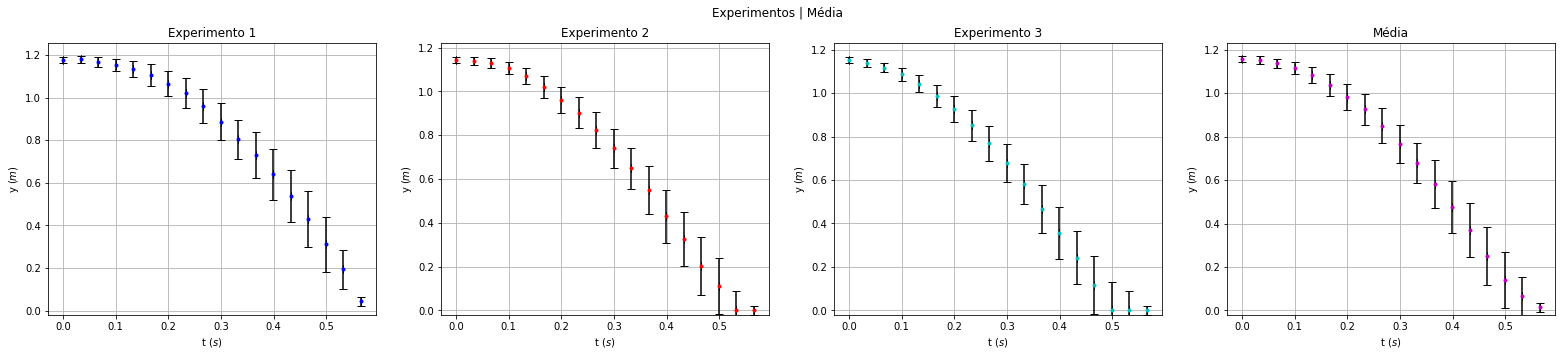

In [40]:
basic_fig, basic_ax = plt.subplots(1,4, figsize=(27,5))
experiments = [('t_e_1', 'y_e_1'), ('t_e_2', 'y_e_2'), ('t_e_3', 'y_e_3'), ('t_mean', 'y_mean')]
colors = ['b', 'r', 'c', 'm']
titles = ["Experimento 1", "Experimento 2","Experimento 3", "Média"]
for i, ax in enumerate(basic_ax):
    t, y, c = experiments[i][0], experiments[i][1], colors[i]
    ax.errorbar(dataset[t], dataset[y], xerr=dataset['t_std'], yerr=dataset['y_std'] ,c=c, fmt='.', capsize=4, ecolor="k")
    
    ax.set_title(titles[i])
    
    ax.set_xlabel(r"t $(s)$")
    ax.set_ylabel(r"y $(m)$")
    
    ax.set_ylim(-.02, ax.get_ylim()[1])
    ax.grid()
basic_fig.suptitle("Experimentos | Média")
basic_fig.savefig("temp.pdf")

$$
\sqrt{\left(\frac{\delta}{\delta t^2}v(t)\right)(\Delta \bar{t})^2} \\
\sqrt{g^2(\Delta \bar{t})^2}\\
\Delta \bar{t} = \frac{1}{N} \sum^{N}_{i=0}\Delta t
$$

# GRAVIDADE

$$
\frac{d^2}{dx^2}f_x \approx \frac{f_{x-0} - 2f_x + f_{x+1}}{\Delta x^2}
$$

In [41]:
def sec_der(y, dt):
    result = []
    for i in range(1, len(y)-1):
        result.append((y[i-1] - 2*y[i] + y[i+1])/dt**2)
    return result

In [67]:
limit_e_1 = 18
g_list_ex1 = sec_der(dataset['y_e_1'].values, dataset['t_e_1'][1]-dataset['t_e_1'][0])
g_ex1 = np.mean(g_list_ex1)
g_ex1

-8.629137473449681

In [68]:
limit_e_2 = 17
g_list_ex2 = sec_der(dataset['y_e_2'].values[:limit_e_2], dataset['t_e_2'][1]-dataset['t_e_2'][0])
g_ex2 = np.mean(g_list_ex2)
g_ex2

-6.534153395153145

In [69]:
limit_e_3 = 15
g_list_ex3 = sec_der(dataset['y_e_3'].values[:limit_e_3], dataset['t_e_3'][1]-dataset['t_e_3'][0])
g_ex3 = np.mean(g_list_ex3)
g_ex3

-7.944944676337065

In [98]:
limit_mean = 16
g_list_mean = sec_der(dataset['y_mean'].values[:limit_mean], dataset['t_mean'][1]-dataset['t_mean'][0])
g_mean = np.mean(g_list_mean)
g_mean

-6.711261909726238

In [66]:
g_err = np.std([g_ex1, g_ex2, g_ex3])
g_err

0.8722518820081822

In [65]:
g = {"g_e_1" : g_ex1,
     "g_e_2" : g_ex2,
     "g_e_3" : g_ex3,
     "g_mean": g_mean,
     "g_err" : g_err
}

$$
\frac{d^2}{dt^2}v(t) = g
$$
SO É VALIDO DURANTE A QUEDA LIVRE, OU SEJA NO MOMENTO QUE TOCA O CHÃO É GG

# VELOCIDADE

Durante a queda, APENAS DURANTE A QUEDA:
$$
\frac{d}{dt}v(t) = g\\
\int^t_0dv = \int^t_0gdt\\
v(t) - v(0) = gt\\
v(0) := 0\\
v(t) = gt
$$

In [71]:
v_e_1 = dataset['t_e_1'].values*g['g_e_1']
v_e_1

array([-0.        , -0.28658324, -0.5740294 , -0.8612838 , -1.14863408,
       -1.4357926 , -1.72323875, -2.01030139, -2.29774755, -2.58509783,
       -2.87225635, -3.15960663, -3.4469569 , -3.73430718, -4.0214657 ,
       -4.3087201 , -4.59674153, -4.88332478])

In [97]:
v_e_2 = dataset['t_e_2'].values*g['g_e_2']
for i in range(limit_e_2, len(v_e_2)):
    v_e_2[i] = 0
v_e_2

array([-0.        , -0.21758731, -0.43502941, -0.65261672, -0.87020403,
       -1.08779134, -1.30523344, -1.52289335, -1.74033546, -1.95785016,
       -2.17536487, -2.39287958, -2.61053948, -2.82798159, -3.0455689 ,
       -3.2630836 , -3.48067091,  0.        ])

In [96]:
v_e_3 = dataset['t_e_3'].values*g['g_e_3']
for i in range(limit_e_3, len(v_e_3)):
    v_e_3[i] = 0
v_e_3

array([-0.        , -0.26456666, -0.52904504, -0.79352342, -1.05809008,
       -1.32265673, -1.58704684, -1.8516135 , -2.11618015, -2.38065853,
       -2.64513691, -2.90970357, -3.17418195, -3.43866033, -3.70322699,
        0.        ,  0.        ,  0.        ])

In [99]:
v_mean = dataset['t_mean'].values*g['g_mean']
for i in range(limit_mean, len(v_mean)):
    v_mean[i] = 0
v_mean

array([-0.        , -0.22328617, -0.44672148, -0.67015679, -0.89364181,
       -1.11707712, -1.34048757, -1.56392288, -1.78738304, -2.01081835,
       -2.23420395, -2.45766411, -2.68114913, -2.90455958, -3.12799489,
       -3.35152963,  0.        ,  0.        ])

In [117]:
v = {"v_e_1" : v_e_1,
     "v_e_2" : v_e_2,
     "v_e_3" : v_e_3,
     "v_mean": v_mean
}
for i in v:
    dataset[i] = v[i]

In [118]:
dataset

,t_e_1,y_e_1,t_e_2,y_e_2,t_e_3,y_e_3,t_mean,y_mean,t_std,y_std,v_e_1,v_e_2,v_e_3,v_mean
0,0.000000,1.176000,0.000000,1.143195,0.000000,1.151376,0.000000,1.156857,0.000000,0.013942,-0.000000,-0.000000,-0.000000,-0.000000
1,0.033211,1.178505,0.033300,1.139649,0.033300,1.138000,0.033270,1.152052,0.000042,0.018718,-0.286583,-0.217587,-0.264567,-0.223286
2,0.066522,1.166814,0.066578,1.129011,0.066589,1.116264,0.066563,1.137363,0.000029,0.021465,-0.574029,-0.435029,-0.529045,-0.446721
3,0.099811,1.152619,0.099878,1.107735,0.099878,1.085333,0.099856,1.115229,0.000031,0.027976,-0.861284,-0.652617,-0.793523,-0.670157
4,0.133111,1.134248,0.133178,1.069911,0.133178,1.043533,0.133156,1.082564,0.000031,0.038100,-1.148634,-0.870204,-1.058090,-0.893642
5,0.166389,1.105856,0.166478,1.021449,0.166478,0.985850,0.166448,1.037718,0.000042,0.050325,-1.435793,-1.087791,-1.322657,-1.117077
6,0.199700,1.065774,0.199756,0.959985,0.199756,0.925658,0.199737,0.983806,0.000026,0.059631,-1.723239,-1.305233,-1.587047,-1.340488
7,0.232967,1.022352,0.233067,0.902067,0.233056,0.852669,0.233030,0.925696,0.000045,0.071259,-2.010301,-1.522893,-1.851613,-1.563923
8,0.266278,0.959724,0.266344,0.824055,0.266356,0.768408,0.266326,0.850729,0.000034,0.080350,-2.297748,-1.740335,-2.116180,-1.787383
9,0.299578,0.886304,0.299633,0.740134,0.299644,0.676774,0.299619,0.767737,0.000029,0.087739,-2.585098,-1.957850,-2.380659,-2.010818


In [121]:
v_std = []
for e1, e2, e3, mean in zip(v['v_e_1'], v['v_e_2'], v['v_e_3'], v['v_mean']):
    v_std.append(np.std([e1,e2, e3, mean]))
dataset['v_std'] = v_std
dataset

,t_e_1,y_e_1,t_e_2,y_e_2,t_e_3,y_e_3,t_mean,y_mean,t_std,y_std,v_e_1,v_e_2,v_e_3,v_mean,v_std
0,0.000000,1.176000,0.000000,1.143195,0.000000,1.151376,0.000000,1.156857,0.000000,0.013942,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
1,0.033211,1.178505,0.033300,1.139649,0.033300,1.138000,0.033270,1.152052,0.000042,0.018718,-0.286583,-0.217587,-0.264567,-0.223286,0.028718
2,0.066522,1.166814,0.066578,1.129011,0.066589,1.116264,0.066563,1.137363,0.000029,0.021465,-0.574029,-0.435029,-0.529045,-0.446721,0.057720
3,0.099811,1.152619,0.099878,1.107735,0.099878,1.085333,0.099856,1.115229,0.000031,0.027976,-0.861284,-0.652617,-0.793523,-0.670157,0.086619
4,0.133111,1.134248,0.133178,1.069911,0.133178,1.043533,0.133156,1.082564,0.000031,0.038100,-1.148634,-0.870204,-1.058090,-0.893642,0.115552
5,0.166389,1.105856,0.166478,1.021449,0.166478,0.985850,0.166448,1.037718,0.000042,0.050325,-1.435793,-1.087791,-1.322657,-1.117077,0.144431
6,0.199700,1.065774,0.199756,0.959985,0.199756,0.925658,0.199737,0.983806,0.000026,0.059631,-1.723239,-1.305233,-1.587047,-1.340488,0.173427
7,0.232967,1.022352,0.233067,0.902067,0.233056,0.852669,0.233030,0.925696,0.000045,0.071259,-2.010301,-1.522893,-1.851613,-1.563923,0.202254
8,0.266278,0.959724,0.266344,0.824055,0.266356,0.768408,0.266326,0.850729,0.000034,0.080350,-2.297748,-1.740335,-2.116180,-1.787383,0.231264
9,0.299578,0.886304,0.299633,0.740134,0.299644,0.676774,0.299619,0.767737,0.000029,0.087739,-2.585098,-1.957850,-2.380659,-2.010818,0.260215


# PLOT VELOCIDADES

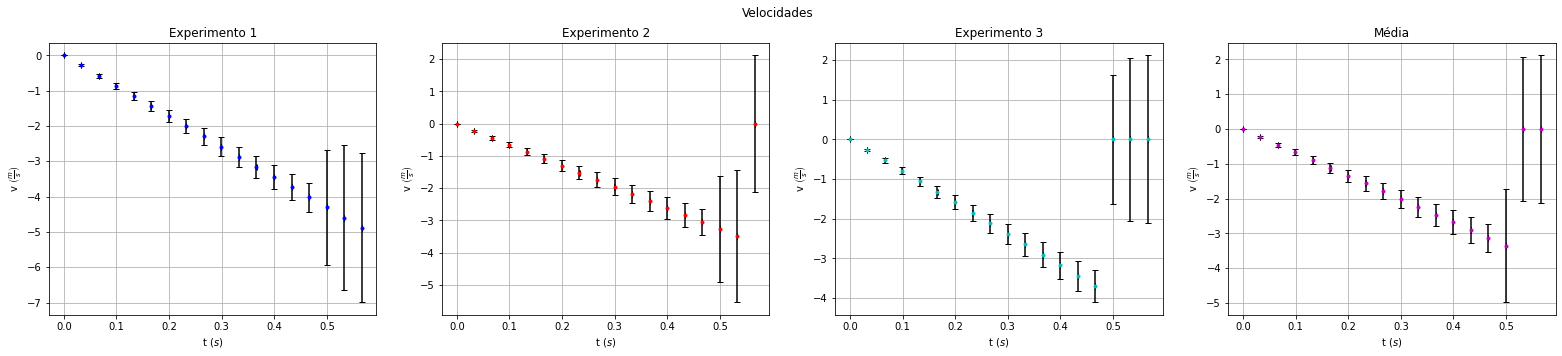

In [154]:
velocidades = [('t_e_1', 'v_e_1'), ('t_e_2', 'v_e_2'),('t_e_3', 'v_e_3'),('t_mean', 'v_mean')]
vel_fig, vel_ax = plt.subplots(1,4, figsize=(27, 5))
vel_fig.suptitle("Velocidades")
for i,ax in enumerate(vel_ax):
    t, vel = velocidades[i]
    c = colors[i]
    title = titles[i]
    ax.errorbar(dataset[t], dataset[vel], xerr=dataset['t_std'], yerr=dataset['v_std'], fmt='.', ecolor="k", capsize=3, c=c)
    
    ax.set_xlabel(r"t $(s)$")
    ax.set_ylabel(r"v $\left(\frac{m}{s}\right)$")
    ax.set_title(title)
    
    ax.grid()

# REGRESSORES EEEEEEEEEEEEEEEEEEEEE

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## REGRESSAO VELOCITY

Não tem pq colocar o score da velocidade já que ela já é definida por uma função linear

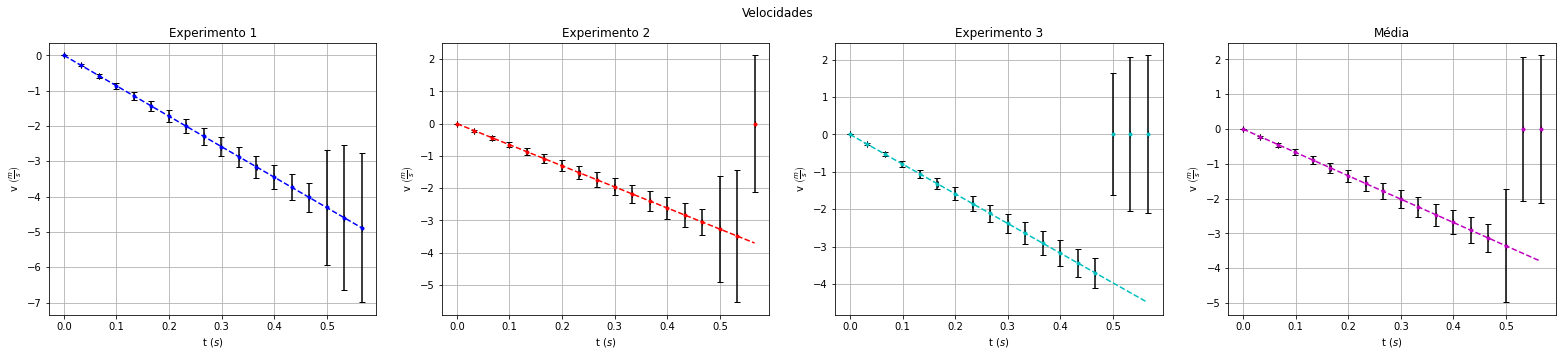

In [155]:
limites = [limit_e_1, limit_e_2, limit_e_3, limit_mean]
for i, ax in enumerate(vel_ax):
    t, vel = velocidades[i]
    c = colors[i]
    
    X = dataset[t].values.reshape(-1, 1)
    Y = dataset[vel].values.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(X[:limites[i]], Y[:limites[i]])
    
    ax.plot(X, model.predict(X), "--", c=c)
vel_fig

## REGRESSÃO POSIÇÃO

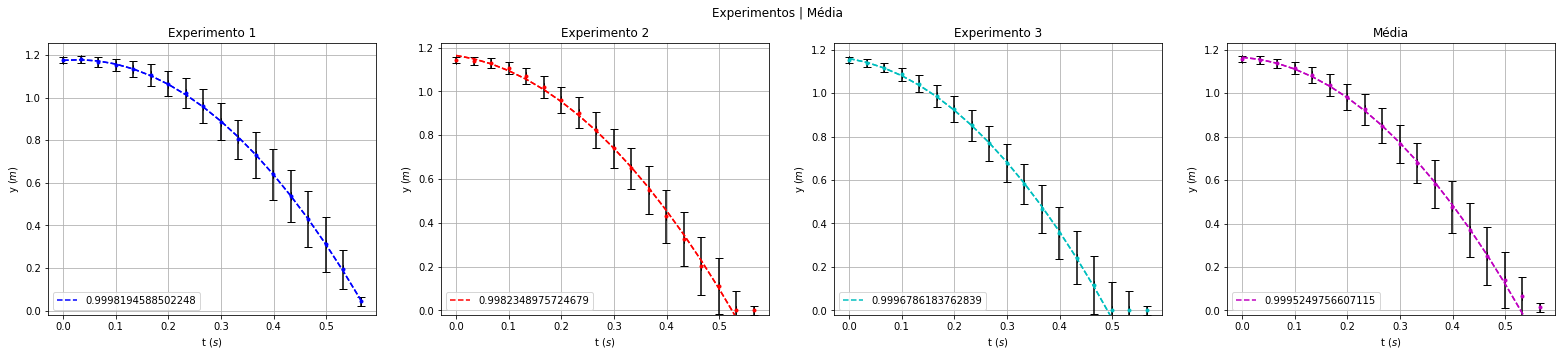

In [157]:
for i, ax in enumerate(basic_ax):
    t, y, c = experiments[i][0], experiments[i][1], colors[i]
    
    X = dataset[t].values.reshape(-1, 1)
    Y = dataset[y].values.reshape(-1, 1)
    
    model = make_pipeline(PolynomialFeatures(2), LinearRegression())
    model.fit(X[:limites[i]], Y[:limites[i]])
    
    ax.plot(X, model.predict(X), "--", c=c, label=model.score(X[:limites[i]], Y[:limites[i]]))
    ax.legend(loc='lower left')
    
basic_fig

# EXPORTING

In [159]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages("Graficos.pdf") as pdf:
    pdf.savefig(basic_fig)
    pdf.savefig(vel_fig)

In [164]:
dataset.to_csv("DATA_COMPLETA.csv", index = 0)

In [204]:
import fpdf as pdf

texto = pdf.FPDF(orientation='L', unit = 'mm', format=(127,685.8))
texto.add_page()
texto.set_font("Arial", size=24)
texto.multi_cell(0, 30, txt=f"g_e_1 = {g['g_e_1']}\tg_e_2 = {g['g_e_2']}\tg_e_3 = {g['g_e_3']}\ng_medio = {g['g_mean']}\ng_err = {g['g_err']}\n", align="L")
texto.output("Texto.pdf")

''

In [205]:
import PyPDF2 as PDF

pdf = open("Graficos.pdf", "rb")
pdf = PDF.PdfFileReader(pdf)

texto = open("texto.pdf", 'rb')
texto = PDF.PdfFileReader(texto)

merger = PDF.PdfFileMerger()
merger.append(pdf)
merger.append(texto)
merger.write("INFO_COMPLETA.pdf")